This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

Data source: https://www.kaggle.com/datasets/crawford/gene-expression/data

##### Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### import library

In [2]:
import numpy as np
from tensorflow.random import set_seed
import pandas as pd

##### set seed

In [3]:
np.random.seed(0)
set_seed(0)

#### load label

In [5]:
label_df = pd.read_csv('/actual.csv')
label_df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [6]:
label_df['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

##### Encode label to numeric.

In [7]:
y = label_df.replace({'ALL':0, 'AML':1})
y = y.set_index('patient')
labels = ['ALL', 'AML']

##### Loading training and testing datasets.

In [9]:
train_df = pd.read_csv('/data_set_ALL_AML_train.csv')
test_df = pd.read_csv('/data_set_ALL_AML_independent.csv')

In [10]:
print("Shape of Training Data: ", train_df.shape)
print("Shape of Testing Data: ", test_df.shape)

Shape of Training Data:  (7129, 78)
Shape of Testing Data:  (7129, 70)


In [11]:
train_df

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


The 7129 gene descriptions are provided as the rows and the values for each patient as the columns. This will clearly require some tidying up.

We can remove "call" columns from training and testing dataframes.

> Indented block



In [12]:
train_to_keep=[col for col in train_df.columns if "call" not in col]
test_to_keep=[col for col in test_df.columns if "call" not in col]

X_train = train_df[train_to_keep]
X_test = test_df[test_to_keep]

Now we can simply transpose both training and testing dataframes so that genes become columns(features) and patients become rows.

In [13]:
X_train = X_train.T
X_test = X_test.T

In [14]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


The first 2 rows are duplicated so we can remove 'Gene Description' and set 'Gene Accession Number' as the column headers.

In [15]:
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]

In [16]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [17]:
X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

In [18]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


Neither the training and testing row indexes are not in numeric order, so it's important that we reorder these, so that the labels will line up with the corresponding data.

In [19]:
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace=True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace=True)

In [20]:
print("Shape of Training data:\t", X_train.shape)
print("Shape of Testing Data:\t", X_test.shape)

Shape of Training data:	 (38, 7129)
Shape of Testing Data:	 (34, 7129)


Now let's split the target labels into training and testing targets.

In [21]:
y_train = y['cancer'][:38]
y_test = y['cancer'][38:]

In [22]:
# y_test

In [23]:
from sklearn.model_selection import train_test_split
X_val, X_test_held_out, y_val, y_test_held_out = train_test_split(X_test, y_test, test_size=0.5, random_state=3407)

In [24]:
X_train.shape, X_val.shape, X_test_held_out.shape

((38, 7129), (17, 7129), (17, 7129))

## Standardizing Features

Note that the test and val set should be transformed only and it should not be fitted

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

##### Get class_weigts

In [27]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(pd.Series(y_train)), y =y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0.0: 0.7037037037037037, 1.0: 1.7272727272727273}

##### Train model

In [28]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create the Sequential model
NN_model = keras.Sequential()

# Add layers to the model using model.add()
NN_model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
NN_model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)))
NN_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NN_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', "Precision", "Recall"])

history = NN_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), class_weight=class_weights, batch_size = 64, epochs = 100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 14.7600 - accuracy: 0.6842 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 14.2484 - val_accuracy: 0.6471 - val_precision: 0.5556 - val_recall: 0.7143
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 13.7937 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 13.9688 - val_accuracy: 0.7059 - val_precision: 0.6250 - val_recall: 0.7143
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 13.5204 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 13.6486 - val_accuracy: 0.7647 - val_precision: 0.7143 - val_recall: 0.7143
Epoch 4/100
1/1 [==============================] - 0s 55ms/step - loss: 13.2203 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 13.3085 - val_accuracy: 0.8235 - val_precision: 0.8333 - val_recall: 0.7143
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 12.8862 - accuracy: 1.0000

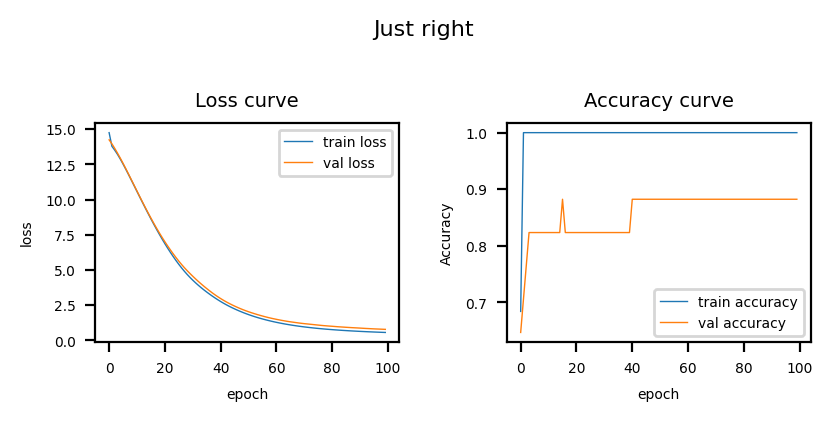

In [29]:
fig, ax= plt.subplots(1, 2, dpi =200, figsize = (4.2,2.1))
ax[0].plot(history.history['loss'], label = "train loss", lw = 0.5)
ax[0].plot(history.history['val_loss'], label = "val loss", lw = 0.5)
ax[1].plot(history.history['accuracy'], label = "train accuracy", lw = 0.5)
ax[1].plot(history.history['val_accuracy'], label = "val accuracy", lw = 0.5)
ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[0].set_title("Loss curve", fontsize=7)
ax[1].set_title("Accuracy curve", fontsize=7)
ax[0].set_xlabel("epoch", fontsize=5)
ax[1].set_xlabel("epoch", fontsize=5)
ax[0].set_ylabel("loss", fontsize=5)
ax[1].set_ylabel("Accuracy", fontsize=5)
ax[0].tick_params(axis='both', which='major', labelsize=5)
ax[1].tick_params(axis='both', which='major', labelsize=5)
plt.suptitle("Just right", fontsize=8)
plt.tight_layout()

2/2 [==============================] - 0s 37ms/step
The accuracy of test set is  0.8529411764705882
The precision of test set is  0.7368421052631579
The recall of test set is  1.0
The f1 of test set is  0.8484848484848484
2/2 [==============================] - 0s 8ms/step
The ROC_AUC of test set is  0.875
The cohen kappa of test set is  0.711864406779661
The MCC of test set is  0.7433919416750282


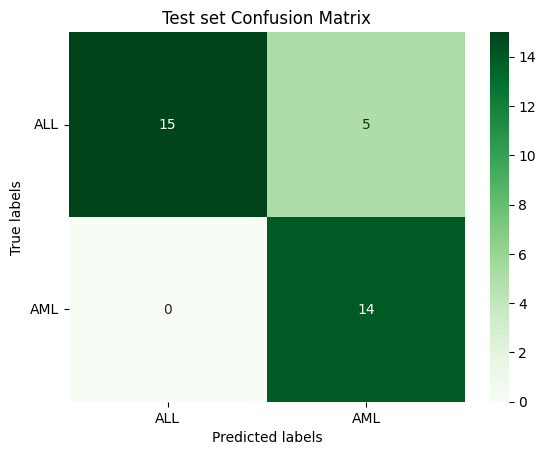

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, matthews_corrcoef
import seaborn as sns

predicted_labels = np.round(NN_model.predict(tf.convert_to_tensor(X_test, dtype=tf.float32)))

type_data = "test"
print("The accuracy of " + type_data + " set is ", accuracy_score(y_test, predicted_labels))
print("The precision of " + type_data + " set is ",  precision_score(y_test, predicted_labels))
print("The recall of " + type_data + " set is ", recall_score(y_test, predicted_labels))
print("The f1 of " + type_data + " set is ",  f1_score(y_test, predicted_labels))
print("The ROC_AUC of " + type_data + " set is ", roc_auc_score(y_test, NN_model.predict(np.array(tf.convert_to_tensor(X_test, dtype=tf.float32)))))
print("The cohen kappa of " + type_data + " set is ", cohen_kappa_score(y_test, predicted_labels))
print("The MCC of " + type_data + " set is ", matthews_corrcoef(y_test, predicted_labels))


cm_nn = confusion_matrix(y_test, predicted_labels)
ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Greens')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test set Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);